In [88]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [89]:
def plot_function(f, title=None, x=None, ylim=None):
    if x is None:
        x = np.linspace(-2, 2, 20)

    y = f(x)
    plt.plot(x, y)
    if ylim:
        plt.ylim(ylim)
    if title:
        plt.title(title)

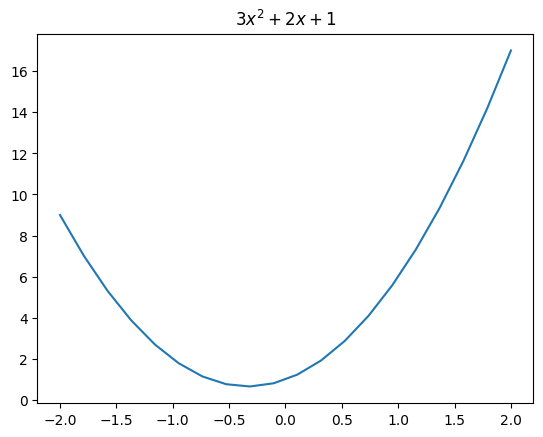

In [90]:
def f(x):
    return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [91]:
def quad(a,b,c, x):
    return a*x**2 + b*x + c

quad(3,2,1, 1.5)

10.75

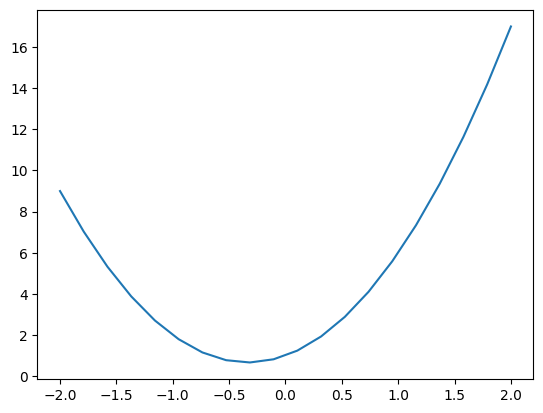

In [92]:
from functools import partial
def mk_quad(a,b,c):
    return partial(quad, a,b,c)

f = mk_quad(3, 2, 1)
plot_function(f)

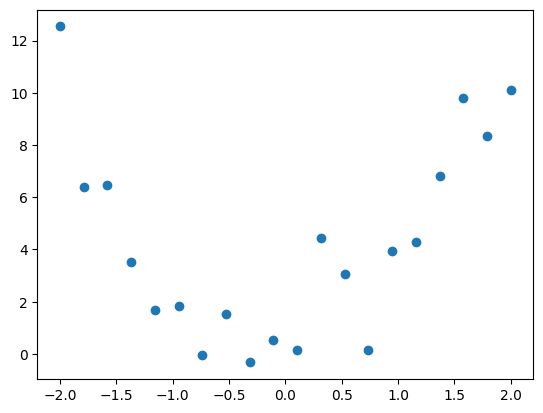

In [93]:
from numpy.random import normal, seed, uniform
np.random.seed(42)
def noise(x, scale):
    return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add):
    return x * (1+noise(x, mult)) + noise(x, add)

x = torch.linspace(-2, 2, 20)[:, None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x, y)

In [94]:
from ipywidgets import interact

@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    plt.scatter(x, y)
    f = mk_quad(a, b, c)
    plot_function(f, ylim=(-3,12))

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [95]:
def mse(y, y_pred):
    return ((y-y_pred)**2).mean()

@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    f = mk_quad(a, b, c)
    loss = mse(y, f(x))
    plot_function(mk_quad(a,b,c), ylim=(-3,12), title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [96]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(y, f(x))

quad_mse([1.5, 1.5, 1.5])

tensor(5.8336, dtype=torch.float64)

<img src="https://th.bing.com/th/id/R.5b85bd8d6ffd635d89b0f1c169021340?rik=Lqb1wMQz6DcFnQ&pid=ImgRaw&r=0" alt="drawing" width="800"/>
<img src="https://machinelearningknowledge.ai/wp-content/uploads/2021/04/typetensors-2048x1336.jpeg" alt="drawing" width="1000"/>



In [97]:
# rank 1 tensor
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [98]:
loss = quad_mse(abc)
print(loss)

loss.backward()  # adds .grad to abc
abc.grad  # the gradient of the loss

tensor(5.8336, dtype=torch.float64, grad_fn=<MeanBackward0>)


tensor([-5.1419,  2.8472, -1.1009])

In [99]:
### show the loss function as a parameter of a, b (c=1)
### this code was generated using ChatGPT
from mpl_toolkits.mplot3d import Axes3D

# This function computes the MSE over a grid of 'a' and 'b' values, keeping 'c' fixed.
# It returns the grid of 'a' and 'b' values along with the corresponding MSE values.
def quad_mse_grid_ab(a_range, b_range, x, y, c_fixed=1):
    # Create meshgrids for 'a' and 'b' parameter spaces
    A, B = np.meshgrid(a_range, b_range, indexing='ij')
    mse_values = np.zeros(A.shape)  # Initialize an array to hold MSE values

    # Loop over all combinations of 'a' and 'b' to compute MSE
    for i in range(len(a_range)):
        for j in range(len(b_range)):
            # Predict y using the quadratic function with current 'a', 'b', and fixed 'c'
            y_pred = quad(A[i, j], B[i, j], c_fixed, x)
            # Calculate and store the MSE for this combination of 'a' and 'b'
            mse_values[i, j] = mse(y, y_pred)

    return A, B, mse_values

# This function plots the MSE loss landscape over a range of 'a' and 'b' values with 'c' fixed.
# It allows for custom ranges for 'a' and 'b' to be specified.
@interact(c_fixed=1.0)
def plot_loss(c_fixed=1):
    # Default parameter ranges for 'a' and 'b' if not provided
    a_range = np.linspace(0, 5, 20)
    b_range = np.linspace(0, 4, 20)

    # Calculate MSE values across the grid
    A, B, mse_values_ab = quad_mse_grid_ab(a_range, b_range, x, y, c_fixed=c_fixed)

    # Set up the plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface of MSE values
    surf = ax.plot_surface(A, B, mse_values_ab, cmap='viridis')

    # Labeling the axes and setting a title
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('MSE')
    ax.set_title('MSE Loss Landscape with c=1')
    # Adding a color bar to indicate the scale of MSE values
    fig.colorbar(surf, shrink=0.5, aspect=5)


interactive(children=(FloatSlider(value=1.0, description='c_fixed', max=3.0, min=-1.0), Output()), _dom_classe…

In [124]:
# rank 1 tensor
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [226]:
loss = quad_mse(abc)
print(loss)

loss.backward()  # adds .grad to abc
abc.grad  # the gradient of the loss

tensor(5.7491, dtype=torch.float64, grad_fn=<MeanBackward0>)


tensor([ 2.9422,  9.3211, -9.0322])

tensor([ 3.1357, -0.6410,  0.6609], requires_grad=True)
loss: 6.09


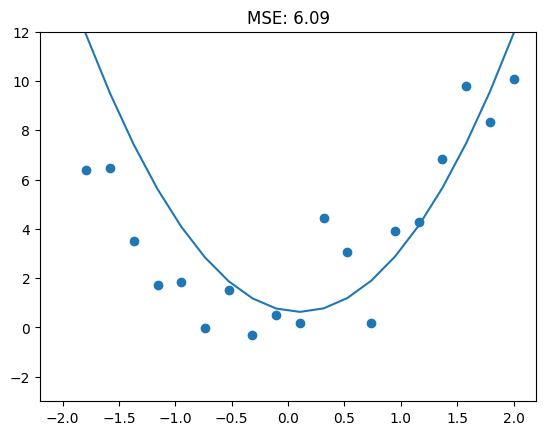

In [227]:
with torch.no_grad():
    abc -= abc.grad * 0.01
    loss = quad_mse(abc)

print(abc)
print(f"loss: {loss:.2f}")
plot_quad(*abc.detach().numpy())

In [230]:
abc = torch.tensor([1.5, 1.5, 1.5])
abc.requires_grad_()
for i in range(6):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad():
        abc -= abc.grad*0.01
    print(f"step={i+1}; loss={loss:.2f}")
    

step=1; loss=5.83
step=2; loss=5.49
step=3; loss=4.90
step=4; loss=4.23
step=5; loss=3.67
step=6; loss=3.33
